### This is a work in progress

This Jupyter notebook outlines the simulation of alpha-accompanied ternary fission using Monte-Carlo methods as found in the work of [Radi, et. al.](https://doi.org/10.1103/PhysRevC.26.2049) 

It also includes simulation of the stopping power of alpha particles through Argon. This is done in collaboration with the Neutron Induced Fission Fragment Tracking Experiment (NIFFTE) to compare with their time projection chamber (TPC) data involving induced fission off various fissile cross-sections.


# Ternary Fission Model

Ternary fission occurs when three charged fragments are produced in a nuclear fission event (as opposed to the conventional binary fission).
The most common fragments from a ternary fission event are alpha particles (He-4 nuclei), and two larger fragments similar to those produced in binary fission.
Nuclides are typically expressed in units of dalton or unified atomic mass (Da or u). The two larger fragments generally consist of a heavy and light fragment with 138±10 and 95±10 dalton (Da) respectively.

The figure below shows a neutron-induced ternary fission event with a Uranium isotope. After the uranium absorbs the incoming neutron, it fissions into three fragments including a heavy, light, and alpha nuclide.

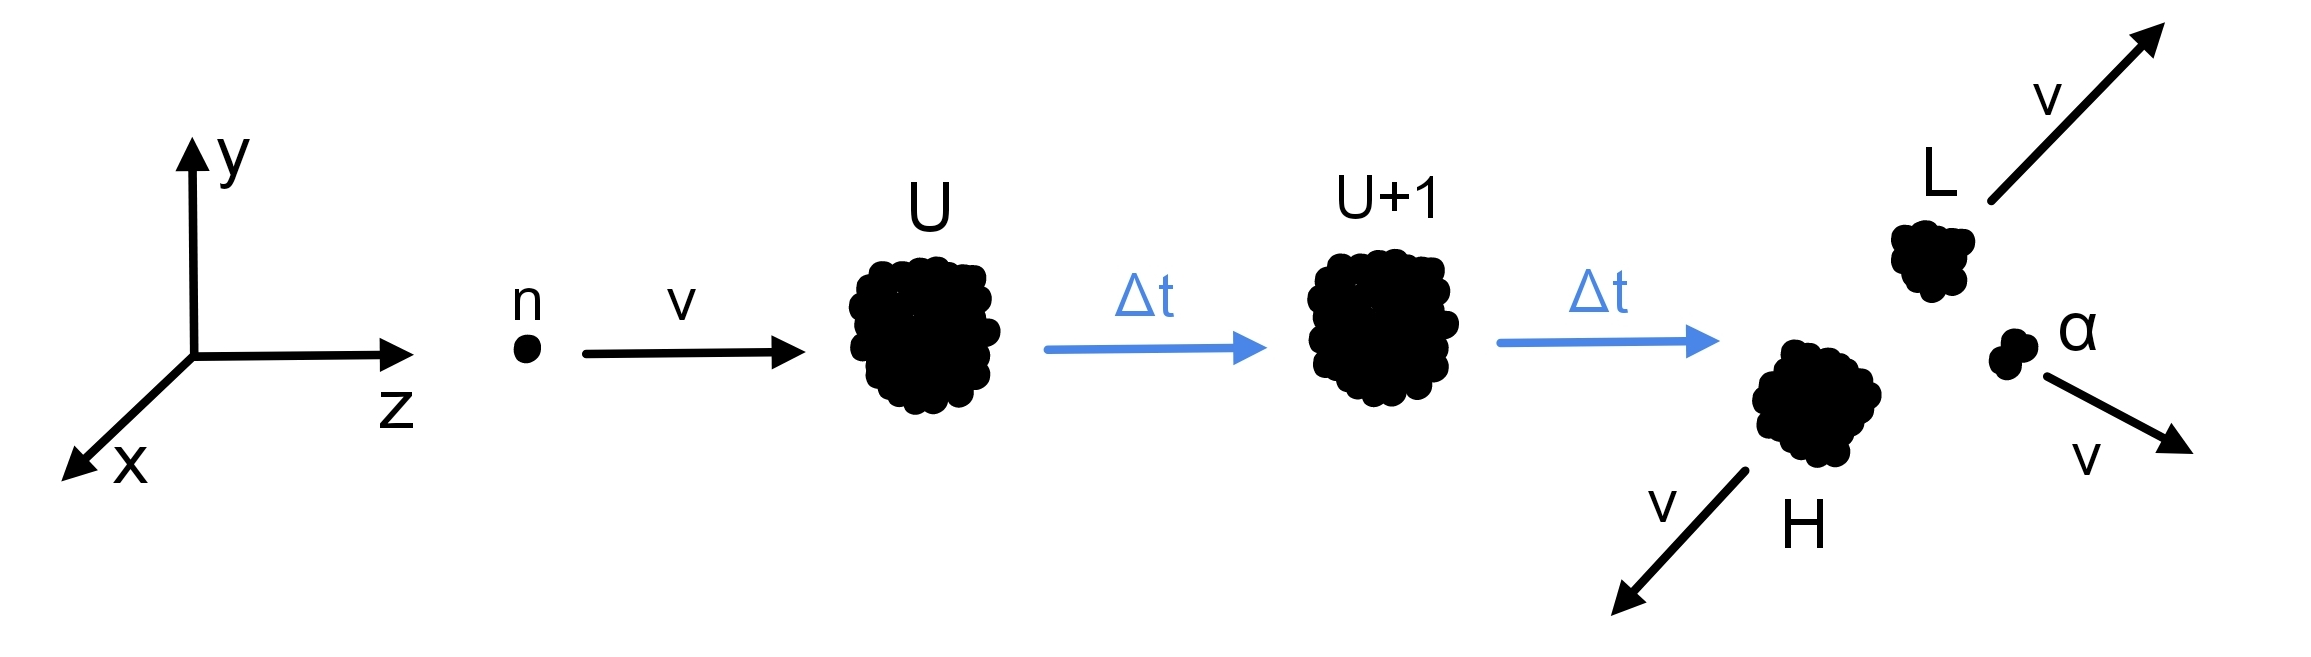

At the nuclear scission point, the dynamics of the nuclear fragments may be analyzed classically by considering the Coulomb interaction between them. The initial conditions of the particles are derived from various theroetical and empircally derived values cited in Radi, et. al.

$\newcommand{\t}[1]{\text{#1}}$
$\newcommand{\mr}[1]{\mathrm{#1}}$
$\newcommand{\mrH}{\mathrm{H}}$
$\newcommand{\mrL}{\mathrm{L}}$
$\newcommand{\mra}{\mathrm{\alpha}}$
$\newcommand{\Lagr}{\mathcal{L}}$
$\newcommand{\dvec}[1]{\dot{\vec{#1}}}$
$\newcommand{\ket}[1]{ |#1\rangle}$
$\newcommand{\bra}[1]{ \langle #1| }$
$\newcommand{\braket}[1]{\left\langle #1 \right\rangle}$
$\newcommand{\brakets}[2]{\left\langle{#1}\middle|{#2}\right\rangle}$

Let $i = \alpha, \mathrm{L}, \mathrm{H}$

#### Conservation of Momentum: 

The differential equation arising from the Coulomb interaction will involve 9 coupled equations relating the positions and velocities of the fragments (one for each vector component). Since momentum is conserved in the system, the equations for the heavy fragment are rendered redundant by considering its relation to the light and alpha fragments.

$
\begin{align}
    \sum\limits_{i} m_i\dvec{r}_i = 0 &= m_\alpha\dvec{r}_\alpha + m_L\dvec{r}_L + m_H\dvec{r}_H \\
    \dvec{r}_H &= -\left(\dfrac{m_\alpha\dvec{r}_\alpha + m_L\dvec{r}_L}{m_H}\right) \\
    \implies \vec{r}_H &= -\left(\dfrac{m_\alpha\vec{r}_\alpha + m_L\vec{r}_L}{m_H}\right)
\end{align}
$

$
\vec{r}_L - \vec{r}_H = \vec{r}_L + \dfrac{m_\alpha\vec{r}_\alpha + m_L\vec{r}_L}{m_H} = \dfrac{(m_H+m_L)\vec{r}_L + m_\alpha \vec{r}_\alpha}{m_H} = \left( 1 + \dfrac{m_L}{m_H} \right)\vec{r}_L + \dfrac{m_\alpha}{m_H}\vec{r}_\alpha
$

This can be similarly done for the alpha fragment relative position and velocities.

#### Dynamical Equations

To obtain the dynamical equations, it is simplest to consider Newton's 2<sup>nd</sup> Law. The only force is the electrostatic force. The force on the alpha fragment is then:

$
\vec{F} = \vec{F}_\mathrm{H} + \vec{F}_\mathrm{L} \\
\implies \ddot{\vec{r}}_\alpha = \dfrac{Z_\alpha q_\mathrm{e}^2}{m_\alpha}
\left(
\dfrac{Z_\mathrm{L}(\vec{r}_\alpha - \vec{r}_\mathrm{L})}{\rho_{\alpha, \mathrm{L}}^3} + 
\dfrac{Z_\mathrm{H}(\vec{r}_\alpha - \vec{r}_\mathrm{H})}{\rho_{\alpha, \mathrm{H}}^3}
\right),
$

and similarly for the light fragment.

Alternatively (as done in Radi, et. al.) the equations may be derived using the Lagrangian of the system.

#### Kinetic Energy:
$
\begin{align}
T = \sum\limits_i\frac{1}{2}m_i\dvec{r}_i^2 
   = \frac{1}{2}\left( m_\alpha\dvec{r}_\alpha^2 + m_L\dvec{r}_L^2 + m_H\dvec{r}_H^2 \right)
\end{align}
$

#### Coulomb Potential Energy: 
$
\begin{align}
U_\text{C} = \dfrac{1}{2}\mathop{\sum\limits_{i,j}}\limits_{i\neq j}q_\mathrm{e}^2\dfrac{Z_i Z_j}{ \rho_{i,j} }
   = q_\mathrm{e}^2 \left( \dfrac{Z_\alpha Z_L}{\rho_{\alpha,L}} + \dfrac{Z_\alpha Z_H}{\rho_{\alpha,H}} + \dfrac{Z_L Z_H}{\rho_{L,H}} \right)
\end{align}
$

where $\rho_{i,j} = |\vec{r}_i- \vec{r}_j| = \sqrt{ (x_i - x_j)^2 + (y_i - y_j)^2 + (z_i - z_j)^2 }$

#### The Lagrangian:

$
\begin{align}
\Lagr &= T - V \\
      &= \frac{1}{2}\left( m_\alpha\dvec{r}_\alpha^2 + m_L\dvec{r}_L^2 + m_H\dvec{r}_H^2 \right) 
       - q_\mathrm{e}^2 \left( \dfrac{Z_\alpha Z_L}{\rho_{\alpha,L}} + \dfrac{Z_\alpha Z_H}{\rho_{\alpha,H}} + \dfrac{Z_L Z_H}{\rho_{L,H}} \right) \\
\end{align}
$

#### Euler-Lagrange Equation:


$x_\alpha\colon \dfrac{d}{dt}\left[\dfrac{\partial\Lagr}{\partial\dot{x}_\alpha}\right] = \dfrac{\partial\Lagr}{\partial x_\alpha}$

$\dfrac{d}{dt}\left[\dfrac{\partial}{\partial\dot{x}_\alpha} \left[ \frac{1}{2}m_\alpha \dot{x}_\alpha^2 \right] \right]
= \dfrac{\partial}{\partial x_\alpha} \left[ -q_\mathrm{e}^2 \left( \dfrac{Z_\alpha Z_L}{|\vec{r}_{\alpha,L}|} + \dfrac{Z_\alpha Z_H}{|\vec{r}_{\alpha,H}|} \right) \right]$

$
\dfrac{d}{dt} [m_\alpha \dot{x}_\alpha]
=
-Z_\alpha q_\mathrm{e}^2 \left( 
    \dfrac{-2Z_L(x_\alpha - x_L)}{ 2\left[ (x_\alpha - x_L)^2 + (y_\alpha - y_L)^2 + (z_\alpha - z_L)^2 \right]^\frac{3}{2} } + 
    \dfrac{-2Z_H(x_\alpha - x_H)}{ 2\left[ (x_\alpha - x_H)^2 + (y_\alpha - y_H)^2 + (z_\alpha - z_H)^2 \right]^\frac{3}{2} } 
\right)
$

$
\implies
\ddot{x}_\alpha = \dfrac{Z_\alpha q_\mathrm{e}^2 }{m_\alpha}
\left( 
    \dfrac{Z_L(x_\alpha - x_L)}{ |\vec{r}_{\alpha,L}|^3 } + 
    \dfrac{Z_H(x_\alpha - x_H)}{ |\vec{r}_{\alpha,H}|^3 } 
\right)
$

As can also be done for the other vector components.

# Monte-Carlo Simulation with Python

### Random Variations of the Initial Coordinates

The Monte-Carlo methods employed rely on variations of the intial conditions of the system at point of nuclear scission. These are derived from theoetrical and experimental sources cited in Radi. et. al. 

$\newcommand{\avgTernKE}{\braket{E_\t{KT}(^{236}\mr{U})}_\infty}$
Total Average Ternary Fragment KE: $\avgTernKE = 155.5 \pm 0.8 \t{ MeV}$

$\newcommand{\scisTernKE}{\braket{E_\t{KT}(^{236}\mr{U})}_\t{sciss}}$
Average KE at Ternary Scission: $\scisTernKE \approx 13 \t{ MeV}$

$\newcommand{\avgAlphaKE}{\braket{E_\alpha}_\infty}$
Average KE of alpha particle: $\avgAlphaKE \approx 16 \t{ MeV}$

$\newcommand{\scisAlphaKE}{\braket{E_\alpha}_\t{sciss}}$
Average KE of alpha at scission: $\scisAlphaKE \approx 5 \t{ MeV}$

$\avgAlphaKE + \avgTernKE 
= 
\dfrac{Z_L Z_H e^2}{\braket{D}} + \dfrac{Z_\alpha Z_L e^2}{\braket{d}} + \dfrac{Z_\alpha Z_H e^2}{\braket{D}-\braket{d}}
+ \scisTernKE + \scisAlphaKE$

Radi. et. al. assume a saddle point $d = \dfrac{D}{\sqrt{\frac{Z_H}{Z_L}} + 1}$

The following abbreviations are used:
 - KE: Kinetic Energy
 - PE: Potential Energy
 - alpha ($\alpha$): alpha particle
 - light: light fragment
 - heavy: heavy fragment

### Implementation

The NumPy and SciPy libraries are used in the numerical integration of the differential equations. The data is plotted and analyzed using CERN's ROOT (PyROOT) analysis framework as well as Matplotlib.


In [2]:
import ROOT # CERN's PyROOT
import numpy as np # NumPy
import scipy as scp # SciPy
import pandas as pd # Pandas
import matplotlib.pyplot as plt # Matplotlib
from scipy.integrate import solve_ivp
from scipy import constants as const
from numpy import linalg as la
from matplotlib import colors as pltc
from matplotlib import animation as anm

# %matplotlib notebook
%jsroot on

This cell defines some physical constants, conversion factors, and helpful functions.

In [4]:
rng = np.random.default_rng() # instantiate numpy's random number generator

MeVtoKE = np.double(96.485332) # [(Da·(fm/zs)^2) / MeV] MeV to Kinetic Energy conversion factor
MeVtoDa = np.double(96.485332) # [Da / (MeV/(m/s)^2)] mass-energy conversion factor

ħ = np.double(0.6582119570) # [MeV·zs] reduced planck's constant
c = np.double(299.792458) # [fm/zs] speed of light
q_e = MeVtoKE*np.double(1.439964548) # [MeV·fm] unit of elementary charge

def KEtoV(m: np.double, T: np.double) -> np.double: # convert from kinetic energy to velocity (magnitude)
    return np.sqrt(2*T*MeVtoKE/m)

def KE(m: np.double, v: np.double) -> np.double: # calculate kinetic energy (KE)
    return m * v**2 / 2 / MeVtoKE

def PE(Zi: np.double, Zj: np.double, ρ: np.double) -> np.double: # calculate potential energy between particles
    return (Zi*Zj * q_e**2 / ρ) / MeVtoKE

# 14 mev incoming neutron
# get 5 or other combos
# run dynamical simulation 

### Monte-Carlo Conditions

This cell is where the intial conditions are defined. Average (expectation) values and uncertainties are based on theoretical and empircally derived values as used in the Radi, et. al. paper. 

Essentially what's going on is that positions ($\vec{r}$) and velocities ($\dot{\vec{r}}$) of the alpha and light fragments are being randomly defined at point of nuclear scission. From these, the heavy position and velocity can be calculated. More abstractly, the initial conditions in phase space are being randomly defined from expectation values. A large number of events ($N$) is used to obtain a useful distribution. The more events considered, the longer the simulation will take.

To explicitely define intial coordinate data for each fragment, intial conditions for the system such as energy and saddle point distance are first selected from distributions. These general values are used to then uniformly distribute component positions and velocities to each fragment (this could be done differently but as pointed out in Radi, it doesn't significantly affect the dynamics).

The intial position and velocity data is stored in 2D NumPy matrices where each collumn are the vector components and each row corresponds to the event number. 

**This is still a work in progress.**

In [408]:

#!====================================!#

N = 50000 # number of events

#!====================================!#

#!======= Initial Coordinate Distributions =======!#

df = pd.read_csv('data/U235-FPY-thermal.txt', sep='\t') # read U-235 thermal neutron yield data

μTα0 = np.double(1.5) # [MeV] average alpha scission KE
σTα0 = np.double(1.0) # [MeV] uncertainty in alpha scission KE
Tα0 = np.abs(rng.normal(μTα0, σTα0, N)) # alpha scission KE distribution

# top 3 yields ZL = (37, 38, 40), AL = (92, 94, 99)

df_L = np.split(df, 2, 0)[0] # light and heavy data frame slices
L = df_L.sample(n=N, replace=True, weights=(df_L.Yield/sum(df_L.Yield))) # [Da] light mass

## atomic numbers
ZU = np.double(92) # uranium atomic number
Zα = np.double(2) # alpha atomic number

# currently, the atomic numbers of the fission products are not being randomized (TODO)
ZL = L.Z.to_numpy(np.double) # light atomic number
ZH = ZU-ZL-Zα # heavy atomic number (difference in atomic numbers)

## nuclide masses
# currently, the masses of the fission products are not being randomize (TODO)
mU = np.double(235.04) # [Da] U-235 mass
mα = np.double(4.0015061791) # [Da] alpha mass
mL = L.A.to_numpy(np.double) # [Da] light mass
mH = mU-mL-mα # [Da] heavy mass
M = mα + mL + mH # [Da] total system mass
mLH = mL + mH # [Da] heavy-light mass

## scission point distances
μD = np.double(21.9) # [fm] mean scission point light-heavy distance
σD = np.double(1.0) # [fm] uncertainty in scission point light-heavy distance
D0 = rng.normal(μD, σD, N) # [fm] scission point light-heavy distance distribution

μd = np.double(9.97) # [fm] mean saddle-point alpha-light distance
σd = np.double(1.04) # [fm] uncertainty in saddle-point alpha-light distance
d0 = rng.normal(μd, σd, N) # [fm] saddle-point alpha-light horizontal distribution
δx = d0 - (mH/mLH)*D0 # [fm] used in calculation of initial coordinates

μRc = np.double(1.2) # [fm] mean saddle-point y-z distance
σRc = np.double(1.3) # [fm] uncertainty in saddle-point y-z distance
Rc = rng.normal(μRc, σRc, N) # saddle-point alpha-light vertical distribution

## scission point velocities
vL0 = np.double(0.013*c) # initial light fragment velocity
vH0 = np.double(0.009*c) # initial heavy fragment velocity

# TL0 = KE(mL, vL0) # [MeV] light fragment initial KE
# TH0 = KE(mH, vH0) # [MeV] heavy fragment initial KE

# alpha position components
rα0 = np.squeeze(np.dstack((-(mLH/M)*δx, (mLH/M)*Rc, np.zeros(N)))) # alpha position vector

vα0 = np.sqrt(2*Tα0*MeVtoKE/mα) # [fm/s]
ẋα0 = rng.choice([-1,1], N)*rng.uniform(0, vα0)
ẏα0 = rng.choice([-1,1], N)*rng.uniform(0, np.sqrt(vα0**2 - ẋα0**2))
żα0 = rng.choice([-1,1], N)*np.sqrt(vα0**2 - ẋα0**2 - ẏα0**2)
ṙα0 = np.squeeze(np.dstack((ẋα0, ẏα0, żα0)))

δv = (mL*vL0 - mH*vH0 + mα*ẋα0) / mLH

# light fragment
xL0 = (mα*δx + mH*D0)/M
yL0 = -mα*Rc/M
zL0 = np.zeros(N)
rL0 = np.squeeze(np.dstack((xL0, yL0, zL0)))

ẋL0 = (vL0 - δv)
ẏL0 = -(mα/mLH)*ẏα0
żL0 = -(mα/mLH)*żα0
ṙL0 = np.squeeze(np.dstack((ẋL0, ẏL0, żL0)))

# heavy fragment
rH0, ṙH0 = -(mα*np.array((rα0,ṙα0)) + np.array((mL[:,None]*rL0,mL[:,None]*ṙL0))) / mH[:,None]

xH0, yH0, zH0 = np.squeeze(np.hsplit(rH0, 3))
ẋH0, ẏH0, żH0 = np.squeeze(np.hsplit(ṙH0, 3))

ραL0 = la.norm(rα0-rL0, axis=1)
ραH0 = la.norm(rα0-rH0, axis=1)

UαL = PE(Zα, ZL, ραL0)
UαH = PE(Zα, ZH, ραH0)

# print(f'D0: {D0}\nd0: {d0}\n')
# print(f'mα: {mα}\nmL: {mL}\nmH: {mH}\n')
# print(f'rα0: {rα0}\nṙα0: {ṙα0}\nvα0: {vα0}\nTα0: {Tα0}\n')
# print(f'rL0: {rL0}\nṙL0: {ṙL0}\nvL0: {vL0}\nTL0: {TL0}\n')
# print(f'rH0: {rH0}\nṙH0: {ṙH0}\nvH0: {vH0}\nTH0: {TH0}\n')
# print(f'Δp: {mα*ṙα0 + mL*ṙL0 + mH*ṙH0}\n')
# print(f'ραL0: {ραL0}\nUαL: {UαL}\n\nραH0: {ραH0}\nUαH: {UαH}')
# plt.plot((xα0, xL0, xH0), (yα0, yL0, yH0), 'bo')
# plt.show()

# run single event
# get mass numbers, atomic number, rx, ry, rz, px, py, pz for α and L
# store in TTree to save memory space

#### Define the differential equation to solve

In [409]:
t_i, t_f = np.double((0, 6)) # intial and final times
λ = 1000
t = np.linspace(t_i, t_f, λ)

kα = Zα * q_e / mα

def coulomb(t, iv, mL, ZL, mH, ZH):
    xα, yα, zα, ẋα, ẏα, żα, xL, yL, zL, ẋL, ẏL, żL = iv
    
    kL = ZL * q_e / mL
    
    rα, rL = np.array((xα, yα, zα)), np.array((xL, yL, zL))
    rH = -(mα*rα + mL*rL) / mH
    rαL, rαH, rLH = rα-rL, rα-rH, rL-rH
    ραL, ραH, ρLH = la.norm((rαL, rαH, rLH), axis=1)
    
    r̈α = kα * ( (ZL*rαL/ραL**3) + (ZH*rαH/ραH**3))
    r̈L = kL * (-(Zα*rαL/ραL**3) + (ZH*rLH/ρLH**3))
    
    ẍα, ÿα, z̈α = r̈α
    ẍL, ÿL, z̈L = r̈L
    
    return (ẋα, ẏα, żα, ẍα, ÿα, z̈α, ẋL, ẏL, żL, ẍL, ÿL, z̈L)

#### Solve for each initial condition (this might take awhile)

In [410]:
%%time
method = 'DOP853' # integration method
# rtol = np.power(10., -6) # relative error tolerance (default is 1e-3)
# atol = np.power(10., -9) # absolute error tolerance (default is 1e-6)

ivs = np.hstack((rα0, ṙα0, rL0, ṙL0)) # initial values
vecs = np.empty((12,N,λ), np.double) # solution matrix

for i, iv in enumerate(ivs):
    vecs[:,i] = scp.integrate.solve_ivp(coulomb, (t_i, t_f), iv, t_eval=t, args=(mL[i],ZL[i],mH[i],ZH[i]), method=method).y # ignore tolerance
#     vecs[:,i] = scp.integrate.solve_ivp(coulomb, (t_i, t_f), iv, t_eval=t, method=method, rtol=rtol, atol=atol).y


CPU times: user 5min 47s, sys: 10.2 s, total: 5min 57s
Wall time: 5min 45s


#### Extract vector data from runs

In [411]:
# extract data
# xα, yα, zα, ẋα, ẏα, żα, y, yy, xL, yL, zL, ẋL, ẏL, żL = vecs
xαf, yαf, zαf, ẋαf, ẏαf, żαf, xLf, yLf, zLf, ẋLf, ẏLf, żLf = vecs[:,:,-1]

# rα, ṙα = np.dstack((xα, yα, zα)), np.dstack((ẋα, żα, ẏα))
# rL, ṙL = np.dstack((xL, yL, zL)), np.dstack((ẋL, ẏL, żL))

# rH, ṙH = -(mα*np.array((rα, ṙα) + np.array((mL[:,None]*rL, mL[:,None]*ṙL)))) / mH[None,:,None,None]
# (xH, yH, zH), (ẋH, ẏH, żH) = np.squeeze(np.split(rH,3,2)), np.squeeze(np.split(ṙH,3,2))

rαf, ṙαf = np.squeeze(np.dstack((xαf, yαf, zαf))), np.squeeze(np.dstack((ẋαf, żαf, ẏαf)))
rLf, ṙLf = np.squeeze(np.dstack((xLf, yLf, zLf))), np.squeeze(np.dstack((ẋLf, ẏLf, żLf)))

# xαf, yαf, zαf = np.squeeze(np.hsplit(rαf, 3))
# ẋαf, ẏαf, żαf = np.squeeze(np.hsplit(ṙαf, 3))
# xLf, yLf, zLf = np.squeeze(np.hsplit(rLf, 3))
# ẋLf, ẏLf, żLf = np.squeeze(np.hsplit(ṙLf, 3))
# xHf, yHf, zHf = np.squeeze(np.hsplit(rHf, 3))
# ẋHf, ẏHf, żHf = np.squeeze(np.hsplit(ṙHf, 3))

vαf = la.norm(ṙαf, axis=1)
# vLf = la.norm(ṙLf, axis=1)
# vHf = la.norm(ṙHf, axis=1)

ραf = la.norm(rαf, axis=1).reshape(N,1)
ρLf = la.norm(rLf, axis=1).reshape(N,1)

uαf = rαf / ραf
uLf = rLf / ρLf

# compute histogram data

θαL = np.degrees(np.arccos(np.einsum('ij, ij -> i', uαf, uLf)))
# ϕα = np.degrees(np.arctan(uαf[:,1] / uαf[:,2]))
# ϕL = np.degrees(np.arctan(uLf[:,1] / uLf[:,2]))

Tαf = KE(mα, vαf)
# TLf = KE(mL, vLf)
# THf = KE(mH, vHf)

In [413]:
θαL.mean()

83.30134652437008

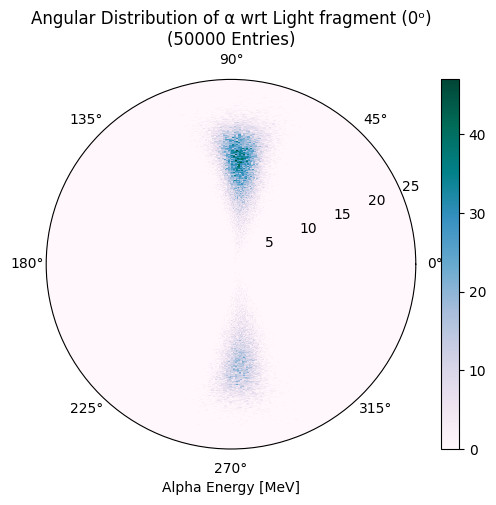

In [412]:
θbins = np.linspace(-np.pi, np.pi, 360)
Tbins = np.linspace(0, 25, 180)

h2 = np.histogram2d(np.sign(yαf)*np.radians(θαL), Tαf, bins=(θbins, Tbins))[0]
A, R = np.meshgrid(θbins, Tbins)

fig, ax = plt.subplots(subplot_kw=dict(projection='polar'))
ax.grid(False)
ax.set_title(f'Angular Distribution of α wrt Light fragment (0ᵒ)\n({N} Entries)')
ax.set_xlabel('Alpha Energy [MeV]')

plt.set_cmap('PuBuGn')
pc = ax.pcolormesh(A, R, h2.T)
fig.colorbar(pc)
# plt.show()
# plt.savefig('alpha_distribution.png', dpi=300, bbox_inches='tight')

# Modeling Stopping Power through the NIFFTE TPC Gas

The Bethe Equation:
$-\braket{\dfrac{dE}{dx}}
= 2\pi N_Ar_e^2m_ec^2\rho \dfrac{Z}{A}\dfrac{z^2}{\beta^2} 
\left[\ln\left(\dfrac{2m_e(\gamma v)^2W_\t{max}}{I^2}\right) - 2\beta^2\right]
= K\rho\dfrac{Z}{A}\dfrac{z^2}{\beta^2}
\left[\ln\left(\dfrac{2m_e(\gamma v)^2W_\t{max}}{I^2}\right) - 2\beta^2\right]$

$N_A$: Avogadro's Constant $= 6.022\cdot10^{23}\ \t{mol}^{-1}$\
$r_e$: classical electron radius $= 2.817\cdot10^{-13}\ \t{cm}$\
$m_e$: electron mass $= 5.485\cdot10^{-4}\ \t{Da}$\
$c$: speed of light $= 2.99792458\cdot10^{10}\ \frac{\t{cm}}{\t{s}}$\
$K = 2\pi N_Am_er_e^2c^2 = 0.153537\ \frac{\t{MeV}\cdot\t{cm}^2}{\t{g}}$\
$\rho$: density of absorber\
$Z$: Atomic number of absorber\
$A$: Atomic mass of absorber\
$z$: Charge of incident particle\
$\beta$: velocity in c units $= \dfrac{v}{c}$\
$\gamma = \dfrac{1}{\sqrt{1-\left(\frac{v}{c}\right)^2}}$: Lorentz factor \
$W_\t{max} = \dfrac{2m_ec^2\beta^2\gamma^2}{1+\frac{2\gamma m_e}{m_\alpha}+\left(\frac{m_e}{m_\alpha}\right)^2}\
\approx {2m_ec^2\beta^2\gamma^2}$: Maximum possible energy transfer to an electron in a single collision\
$I$: Mean excitation energy of absorber\
$\delta(\beta\gamma)$: density effect correction to ionization energy loss

In [8]:
MeVtoKE = np.double(1.602176e-6) # [g·(cm/s)^2 / MeV] 
mα = np.double(6.6446573e-24) # [g] alpha mass in grams
ADCconv = np.double(280) # [ADC / MeV] MeV to ADC

K = np.double(0.153537) # [MeV·cm^2 / g]

Zg = np.double(18) # gas element proton number (Ar)
mg = np.double(39.948) # [Da=g/mol] mass of gas particle (Ar)
ρAr = np.double(1.664e-3) # [g/cm^3] density of Ar at STP
ρiBu = np.double(2.51e-3) # [g/cm^3] density of isobutane at STP
ρ = np.double(.95*ρAr+.05*ρiBu) # [g/cm^3] density of TPC gas mixture
c = np.double(29.9792458e9) # [cm/s] speed of light
me = np.double(9.10938e-28) # [g] electron mass
I = np.double(188.000000e-6) # [MeV] mean excitation energy of gas (Ar)
x_i, x_f = np.double((0., 50)) # [cm] initial and final distance
x = np.linspace(x_i, x_f, λ)

def bethe(x, E):
    
    ẋ = KEtoV(mα, E)
    β = ẋ/c
    γ = 1. / np.sqrt(1 - β**2)
    Wmax = 2*me*(ẋ*γ)**2 / MeVtoKE
    
    dEdx = -K*ρ*Zg*Zα**2/(mg*β**2) * (np.log(Wmax**2 / I**2) - 2*β**2)

    return dEdx
    

In [9]:
%%time
method = 'LSODA' # integration method
rtol = np.power(10., -6) # relative error tolerance (default is 1e-3)
atol = np.power(10., -6) # absolute error tolerance (default is 1e-6)

Tα = np.empty((N,λ), np.double)

# Ef = scp.integrate.solve_ivp(bethe, (x_i, x_f), t_eval=x, y0=[np.max(Tαf)], method=method, rtol=rtol, atol=atol).y[0]

for i, T in enumerate(Tαf):
#     Ef[i] = scp.integrate.solve_ivp(bethe, (x_i, x_f), t_eval=x, y0=[Ei], method=method).y[0] # ignore tolerance
    Tα[i] = scp.integrate.solve_ivp(bethe, (x_i, x_f), t_eval=x, y0=[T], method=method, rtol=rtol, atol=atol).y[0]
    

CPU times: user 7min 59s, sys: 36.3 s, total: 8min 35s
Wall time: 7min 49s


14.717161017122539


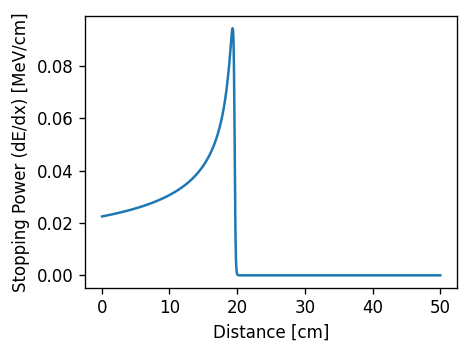

In [10]:
i = 21 # np.argmin(Tαf)
dEdx = -np.diff(Tα)
print(Tα[i,0])
plt.figure(figsize=(4,3), dpi=120)
plt.axes(xlabel='Distance [cm]', ylabel='Stopping Power (dE/dx) [MeV/cm]')
plt.plot(x[1:], dEdx[i])
plt.show()

In [11]:
αdists = x[np.argmin(Tα>0.4, axis=1)]

In [13]:
len(np.where(Tα[:,f] > Tmin)[0])

NameError: name 'f' is not defined

In [14]:
TPCmaxd = 5.4
Tmin = 0.4

f = np.where(x<TPCmaxd)[0][-1]
g = np.where(Tα[:,f] < Tmin)[0]

TPCTα = (Tαf - Tα[:,f]) #+ rng.uniform(-2, 2, N)

TPCdists = np.empty(N, np.double)
TPCdists[np.where(Tα[:,f] > Tmin)[0]] = TPCmaxd + np.abs(rng.normal(0,1,len(np.where(Tα[:,f] > Tmin)[0]))) + rng.uniform(0, TPCTα[np.where(Tα[:,f] > Tmin)[0]] / np.max(TPCTα[np.where(Tα[:,f] > Tmin)[0]]))
TPCdists[np.where(Tα[:,f] < Tmin)[0]] = x[np.argmin(Tα[g] > 0.4, axis=1)] + rng.uniform(0,1, len(x[np.argmin(Tα[g] > 0.4, axis=1)]))

## ROOT Plots

In [75]:
type(df.A.max()-df.A.min()+1)

numpy.int64

In [76]:
hists = {}

if 'cv' not in locals():
    cv = ROOT.TCanvas('cv','Canvas', 950, 500)

def fill_hist(h, data: np.ndarray, dim: int, weights=None, N: int=N):
    h.Reset()
    
    if not isinstance(weights, np.ndarray): weights=np.ones(N)
        
    if dim == 1:
        h.FillN(N, data, weights)
            
    elif dim == 2:
        h.FillN(N, data[0], data[1], weights)

        
    elif dim == 3:
        h.FillN(N, data[0], data[1], data[2], weights)
        
    else:
        print('Unkown type of ROOT histogram!')

def def_hist(hists: dict, data: tuple, dim: int, dtype: str='double', nbins=100, log: bool=False):
    name = data[0]
    title = data[1]
    
    if dim == 1:
        xmin, xmax = data[2]
        xtitle = data[3]
        
        if name not in hists:
            match dtype:
                case 'byte': hists[name] = ROOT.TH1C()
                case 'short': hists[name] = ROOT.TH1S()
                case 'int': hists[name] = ROOT.TH1I()
                case 'float': hists[name] = ROOT.TH1F()
                case 'double': hists[name] = ROOT.TH1D()
        
        h = hists[name]
        h.SetNameTitle(name, title)
        h.SetBins(nbins, xmin, xmax)
        h.SetXTitle(xtitle)
        h.SetYTitle('Entries')
        
    elif dim == 2:
        xmin, xmax, ymin, ymax = data[2]
        xtitle, ytitle = data[3]
        
        if log:
            binsperdecade = 100
            ndecades = 4
            nEdges = binsperdecade * ndecades
            
            # make log scale binning for length vs adc plots
            tADCEdges = np.empty(nEdges, np.double)
            tADCEdges = np.power(10, 1 + np.arange(nEdges, dtype=np.double) / binsperdecade)
            hists[name] = ROOT.TH2D(name, title, nEdges-1, tADCEdges, nbins, ymin, ymax)
            hists[name].SetXTitle(xtitle)
            hists[name].SetYTitle(ytitle)
            
            return
        
        if name not in hists:
            hists[name] = ROOT.TH2D()
        
        h = hists[name]
        h.SetNameTitle(name, title)
        h.SetXTitle(xtitle)
        h.SetYTitle(ytitle)
        h.SetBins(nbins, xmin, xmax, nbins, ymin, ymax)
            
        
    else:
        xmin, xmax, ymin, ymax, zmin, zmax = data[2]
        xtitle, ytitle, ztitle = data[3]
        
        if name not in hists:
            hists[name] = ROOT.TH3D()
        
        h = hists[name]
        h.SetNameTitle(name, title)
        h.SetBins(nbins, xmin, xmax, nbins, ymin, ymax, nbins, zmin, zmax)
        h.SetXTitle(xtitle)
        h.SetYTitle(ytitle)
        h.SetZTitle(ztitle)

def draw_hists(cv, hists, opt: str='', r: int=1, c: int=1, log_scale: tuple=()):
    cv.Clear()
    cv.Divide(c, r)
    logs = len(log_scale)
    
    for i, h in enumerate(hists):
        s = cv.cd(i+1)
        
        if logs > 0:
            s.SetLogx(log_scale[0])
            if logs > 1:
                s.SetLogy(log_scale[1])
                if logs > 2: s.SetLogz(log_scale[2])
                
        h.Draw(opt)
            
    cv.Draw()

def init_hists(hists: dict):
    
    # h1Y
    dim = 1
    name = 'h1Y'
    title = 'U-235 Yield'
    xmin, xmax = df.A.min(), df.A.max()+1
    xtitle = 'Mass Number (A)'
    def_hist(hists, (name, title, (xmin,xmax), (xtitle)), dim, 
             dtype='double', nbins=round(df.A.max()-df.A.min()+1))
    fill_hist(hists[name], np.double(df.A), dim, df.Yield.to_numpy()/2, N=df.A.size) 
    
    # h1D
    dim = 1
    name = 'h1D'
    title = 'Light-Heavy Seperation Distance'
    xmin, xmax = 15, 45
    xtitle = '[fm]'
    def_hist(hists, (name, title, (xmin,xmax), (xtitle)), dim)
    fill_hist(hists[name], D0, dim)
    
    # h1d
    dim = 1
    name = 'h1d'
    title = 'Alpha-Light Seperation Distance'
    xmin, xmax = 5, 15
    xtitle = '[fm]'
    def_hist(hists, (name, title, (xmin,xmax), (xtitle)), dim)
    fill_hist(hists[name], d0, dim)
    
    # h1Rc
    dim = 1
    name = 'h1Rc'
    title = 'Alpha Off-Axis Seperation Distance'
    xmin, xmax = 0, 8
    xtitle = '[fm]'
    def_hist(hists, (name, title, (xmin,xmax), (xtitle)), dim)
    fill_hist(hists[name], Rc, dim)
    
#     # h1Ta0
#     dim = 1
#     name = 'h1Ta0'
#     title = 'Alpha Scission-Point Kinetic Energy'
#     xmin, xmax = 0, 32
#     xtitle = 'Energy [MeV]'
#     def_hist(hists, (name, title, (xmin,xmax), (xtitle)), dim)
#     fill_hist(hists[name], Tα0, dim)
    
#     # h1Taf
#     dim = 1
#     name = 'h1Taf'
#     title = 'Alpha Final Kinetic Energy'
#     xmin, xmax = 0, 32
#     xtitle = 'Energy [MeV]'
#     def_hist(hists, (name, title, (xmin,xmax), (xtitle)), dim)
#     fill_hist(hists[name], Tαf, dim)
    
#     # h1TL0
#     dim = 1
#     name = 'h1TL0'
#     title = 'Light Scission-Point Kinetic Energy'
#     xmin, xmax = 4, 10
#     xtitle = 'Energy [MeV]'
#     def_hist(hists, (name, title, (xmin,xmax), (xtitle)), dim)
#     fill_hist(hists[name], TL0, dim)
    
#     # h1TLf
#     dim = 1
#     name = 'h1TLf'
#     title = 'Light Final Kinetic Energy'
#     xmin, xmax = 70, 110
#     xtitle = 'Energy [MeV]'
#     def_hist(hists, (name, title, (xmin,xmax), (xtitle)), dim)
#     fill_hist(hists[name], TLf, dim)

#     # h1θαL
#     dim = 1
#     name = 'h1thaL'
#     title = 'Alpha-Light #theta_{#alpha-L} Angular Distribution'
#     xmin, xmax = 50, 100
#     xtitle = '[arcdegree]'
#     def_hist(hists, (name, title, (xmin,xmax), (xtitle)), dim)
#     fill_hist(hists[name], θαL, dim)
    
#     # h1ϕαL
#     dim = 1
#     name = 'h1phaL'
#     title = '#Delta#phi Angle Distribution'
#     xmin, xmax = -180, 180
#     xtitle = '[arcdegree]'
#     def_hist(hists, (name, title, (xmin,xmax), (xtitle)), dim)
#     fill_hist(hists[name], ϕα-ϕL, dim)
    
#     # h2α
#     dim = 2
#     name = 'h2Tafxa'
#     title = 'Alpha Length vs. Energy'
#     xmin, xmax = 1, 1e5
#     xtitle = 'Energy [MeV]'
#     ymin, ymax = 0, 50
#     ytitle = 'Length [cm]'
#     def_hist(hists, (name, title, (xmin,xmax,ymin,ymax), (xtitle, ytitle)), dim, 500, log=True)
#     fill_hist(hists[name], (ADCconv*Tαf, αdists+rng.uniform(-1.5,1.5,N)), dim)
    
#     # h2TPCTα
#     dim = 2
#     name = 'h2TPCTa'
#     title = 'Alpha Length vs. ADC'
#     xmin, xmax = 1, 1e5
#     xtitle = 'Energy [ADC]'
#     ymin, ymax = 0, 10
#     ytitle = 'Length [cm]'
#     def_hist(hists, (name, title, (xmin,xmax,ymin,ymax), (xtitle, ytitle)), dim, 500, log=True)
#     fill_hist(hists[name], (ADCconv*(TPCTα+ rng.uniform(-1, 1, N)), TPCdists), dim)

init_hists(hists)

In [80]:
draw_hists(cv, [hists['h1Y']])

In [40]:
# draw_hists(cv, [hists['h2Tafxa']], opt='col', log_scale=(True,False))

In [38]:
draw_hists(cv, [hists['h2TPCTa']], opt='col',log_scale=(True,False))
cv.SaveAs("alpha_LvsADC.png")

KeyError: 'h2TPCTa'

In [39]:
draw_hists(cv, [hists['h1D'], hists['h1d'], hists['h1Rc']], r=1, c=3)

In [44]:
cv.SetCanvasSize(4000, 2500);
hists['h1Ta0'].SetLineWidth(6)
hists['h1Taf'].SetLineWidth(6)

In [45]:
draw_hists(cv, [hists['h1Ta0'], hists['h1Taf']], r=2, c=1)
cv.SaveAs("alpha_energies.png")

Info in <TCanvas::Print>: png file alpha_energies.png has been created


In [36]:
# cv.SetCanvasSize(4000, 3000);
hists['h1thaL'].SetLineWidth(6)
draw_hists(cv, [hists['h1thaL']])
cv.SaveAs("angular.png")

Info in <TCanvas::Print>: png file angular.png has been created


In [24]:
draw_hists(cv, [hists['h1phaL']])

In [25]:
draw_hists(cv, [hists['h1phL']])

KeyError: 'h1phL'

In [48]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


In [47]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


#### Plot intial (red) and final (blue) positions of particles

In [89]:
# plt.figure(figsize=(4,3), dpi=250)
# plt.axes(xlabel='x [fm]', ylabel='y [fm]')
# plt.plot((xα0, xL0, xH0), (yα0, yL0, yH0), 'r.')
# plt.plot((xαf, xLf, xHf), (yαf, yLf, yHf), 'b.')
# plt.show()

#### Animate the events as a gif

In [90]:
# def init():
#     pts.set_data([], [])

# def animate(i):
#     pts.set_data((xα[:,i], xL[:,i], xH[:,i]), (yα[:,i], yL[:,i], yH[:,i]), 'b.')
#     return pts,

# fig = plt.figure(dpi=200)
# ax = plt.axes(xlim=(np.round(np.min(xHf)-5), np.round(np.max(xLf)+5)), 
#               ylim=(np.round(np.min(yαf)-5), np.round(np.max(yαf)+5)),
#               xlabel='x [fm]', ylabel='y [fm]')
# pts, = plt.plot([], [])

# fission = anm.FuncAnimation(fig, animate, frames=λ, interval=1)
# fission.save('fission.gif', writer='ffmpeg', fps=30)